In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Example One: Toy example.
$y=5x+10+\varepsilon$

$\varepsilon\sim{\cal N}(0,\sigma^2)$ and $\sigma=5$

In [33]:
#Generate data:
np.random.seed(100)
error=np.random.normal(0,10,10)
X=range(10)

In [34]:
error

array([-17.49765473,   3.42680403,  11.53035803,  -2.52436037,
         9.81320787,   5.14218841,   2.21179669, -10.70043331,
        -1.89495831,   2.55001444])

In [35]:
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### (1) Let's generate y and prepare the data for using

In [36]:
#1. What is the type of X,error?
print type(X)
print type(error)

<type 'list'>
<type 'numpy.ndarray'>


In [37]:
#2. Change the type of X, to np array
X=np.asarray(X)

In [38]:
print type(X)
print type(error)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [39]:
#3.Generate y
y=5*X+10+error
y

array([ -7.49765473,  18.42680403,  31.53035803,  22.47563963,
        39.81320787,  40.14218841,  42.21179669,  34.29956669,
        48.10504169,  57.55001444])

In [40]:
# Pandas Data frame
#1.Make the pandas dataframe.
data=pd.DataFrame([list(X),list(y)]).T
data.head(3)

,0,1
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358


In [41]:
#2. Change the name for column 0 and 1
data.columns=["x","y"]
data

,x,y
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358
3,3.0,22.475640
4,4.0,39.813208
5,5.0,40.142188
6,6.0,42.211797
7,7.0,34.299567
8,8.0,48.105042
9,9.0,57.550014


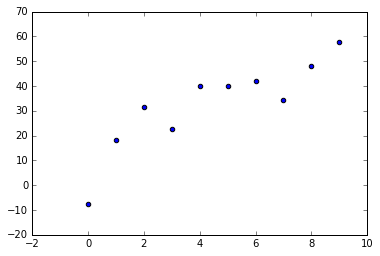

In [42]:
#visulize the data.
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(data.x,data.y)
plt.show()

#### (2) Use OLS to estimate the coefficients by hands

In [43]:
#Take a quick look at the data
data.describe()

,x,y
count,10.00000,10.000000
mean,4.50000,32.705696
std,3.02765,18.194432
min,0.00000,-7.497655
25%,2.25000,24.739319
50%,4.50000,37.056387
75%,6.75000,41.694395
max,9.00000,57.550014


#### Correlation. Very important for linear model. If you don't know what is it, check:https://en.wikipedia.org/wiki/Correlation_and_dependence 

In [44]:
#Take a look the correlation of X and y
data.corr()

,x,y
x,1.000000,0.873941
y,0.873941,1.000000


In [45]:
#Calculate the coefficient. We have closed form for it by OLS.

$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}\end{array}\right.
$$

In [47]:
#2.1 get xy and x-squred term 
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

,x,y,x_sqr,xy
0,0.0,-7.497655,0.0,-0.000000
1,1.0,18.426804,1.0,18.426804
2,2.0,31.530358,4.0,63.060716


In [48]:
#2.2 Let's calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 5.25187988624


In [49]:
#2.3 let's calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 9.0722367887


In [50]:
#2.4. Let's get predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,-7.497655,0.0,-0.000000,9.072237,-16.569892
1,1.0,18.426804,1.0,18.426804,14.324117,4.102687
2,2.0,31.530358,4.0,63.060716,19.575997,11.954361


In [51]:
#2.5. Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.7637724875971592

#### (3)Let's try package from statsmodels to double check our answer

In [52]:
lm = smf.ols(formula='y ~ X', data = data).fit()

In [54]:
print lm.params
print lm.rsquared

Intercept    9.072237
X            5.251880
dtype: float64
0.763772487597


In [56]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     25.87
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           0.000946
Time:                        10:57:09   Log-Likelihood:                -35.459
No. Observations:                  10   AIC:                             74.92
Df Residuals:                       8   BIC:                             75.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.0722      5.513      1.646      0.1

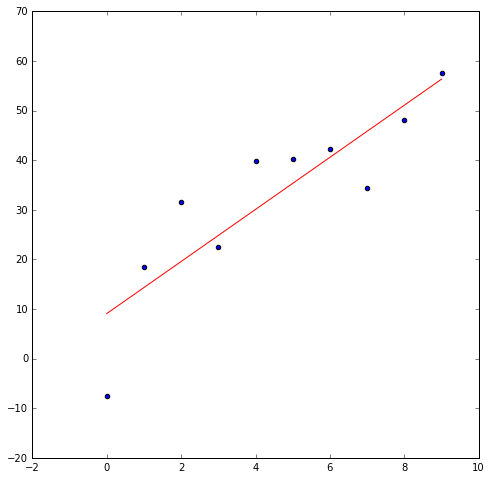

In [57]:
#7. Visulize the model
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(data.pred,c="r")
plt.show()
## SS - should we put axe labels on the plot?

### Excerise. Real-world example 

#### q1. Real Estate Prices in NYC

This is the data on multi-apartment house sale prices in the zip code 10466 (Bronx). Let's see how sale price depends on the house size (besides other relevant parameters)

In [7]:
data_3=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/data/NYC_RE_10466__multi.csv",index_col=0)
data_3.index=range(len(data_3))

In [8]:
#What is the min/max of gross_sq_feet and sale_price?
data_3.describe()

,gross_sq_feet,sale_price
count,136.000000,1.360000e+02
mean,19734.764706,1.889870e+06
std,22391.028099,2.081844e+06
min,1620.000000,1.325000e+05
25%,4080.250000,4.800000e+05
50%,6577.500000,6.612500e+05
75%,37027.500000,3.328860e+06
max,84340.000000,8.865379e+06


In [9]:
#Q1. What is the correlation of gross_sq_feet and sale_price?
data_3.corr()

,gross_sq_feet,sale_price
gross_sq_feet,1.000000,0.926478
sale_price,0.926478,1.000000


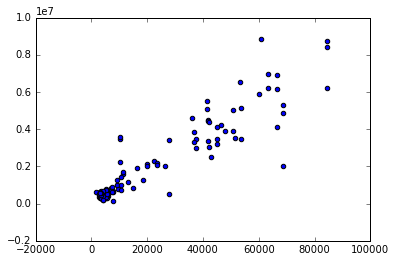

In [10]:
#Q2. Visulize the data set as points.
plt.scatter(data_3.gross_sq_feet,data_3.sale_price)
plt.show()

In [11]:
#Q3. Get w1,w2 and R-squared.(Feel free to calculate by hand or use the package/any packages.)
lm = smf.ols(formula='sale_price ~ gross_sq_feet', data = data_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     812.1
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           9.99e-59
Time:                        15:36:32   Log-Likelihood:                -2038.2
No. Observations:                 136   AIC:                             4080.
Df Residuals:                     134   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.899e+05      9e+04      2.109

In [12]:
#Q4. write "error" and "pred" term into the datafram, and what is the correlation between error and gross_sq_feet
data_3.loc[:,"error"]=lm.resid
data_3.loc[:,"pred"]=lm.predict()
data_3.head(3)

,gross_sq_feet,sale_price,error,pred
0,7745,700000.0,-157061.296216,857061.296216
1,3700,335000.0,-173621.477152,508621.477152
2,5250,510000.0,-132139.825619,642139.825619


In [13]:
data_3.loc[:,["gross_sq_feet","error"]].corr()

,gross_sq_feet,error
gross_sq_feet,1.000000e+00,9.124588e-16
error,9.124588e-16,1.000000e+00


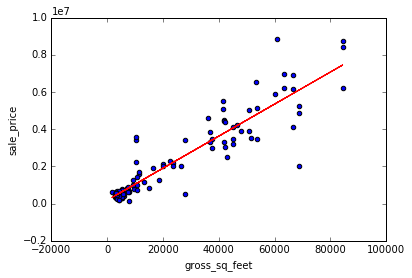

In [14]:
#Q5. Plot the predicted values and observations.
data_3.plot(kind='scatter',x='gross_sq_feet',y='sale_price')
plt.plot(data_3.gross_sq_feet,lm.predict(),'r-')
plt.show()

#### q2. Example 2. 

In [28]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/household.csv")

In [29]:
data_4.head()

,city,Total_Households,Households_Inc_More_125000
0,Aaronsburg,423.0,20.0
1,Abbeville,19377.0,1365.0
2,Abbot,333.0,28.0
3,Abbotsford,1094.0,91.0
4,Abbott,431.0,67.0


In [30]:
#q1.How many observations do we have? (shape)
data_4.shape

(15521, 3)

In [31]:
#q2.How many Households in "New York"? How many Households have more than 125000 income in New York? (Skip it if you don't know the code)
data_4[data_4.city=="New York"]

,city,Total_Households,Households_Inc_More_125000
9700,New York,741609.0,230053.0


In [40]:
#q3.1 Show the descreption of the data. Look at the max of "Households_Inc_More_125000". Which city has the max?
print data_4.describe() 
#q3.2 Can you find which city is the one has max number of "Total_ Households"
print data_4[data_4.Total_Households==1.063253e+06]
#q3.3. What is the min of "Households_Inc_More_125000"? You will see the reason why I drop 0 terms.

       Total_Households  Households_Inc_More_125000
count      1.552100e+04                15521.000000
mean       7.549882e+03                 1123.977514
std        3.061607e+04                 4891.886421
min        5.000000e+00                    1.000000
25%        4.330000e+02                   27.000000
50%        1.304000e+03                  105.000000
75%        4.869000e+03                  569.000000
max        1.063253e+06               230053.000000
         city  Total_Households  Households_Inc_More_125000
6382  Houston         1063253.0                    156656.0


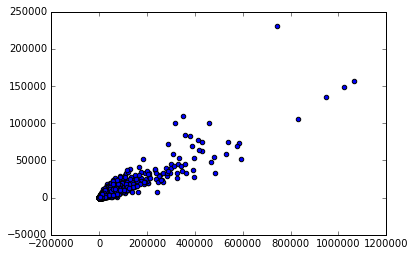

In [43]:
# q4. Visulize the data 
plt.scatter(data_4.Total_Households,data_4.Households_Inc_More_125000)
plt.show()

In [44]:
# q5. Model: Households_Inc_More_125000=w1*Total_Households+w0  and get w1,w0 and R-squared. And plot the result.
lm = smf.ols(formula='Households_Inc_More_125000 ~ Total_Households', data = data_4).fit()
print(lm.summary())

                                OLS Regression Results                                
Dep. Variable:     Households_Inc_More_125000   R-squared:                       0.845
Model:                                    OLS   Adj. R-squared:                  0.845
Method:                         Least Squares   F-statistic:                 8.465e+04
Date:                        Fri, 09 Sep 2016   Prob (F-statistic):               0.00
Time:                                15:57:31   Log-Likelihood:            -1.3941e+05
No. Observations:                       15521   AIC:                         2.788e+05
Df Residuals:                           15519   BIC:                         2.788e+05
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------

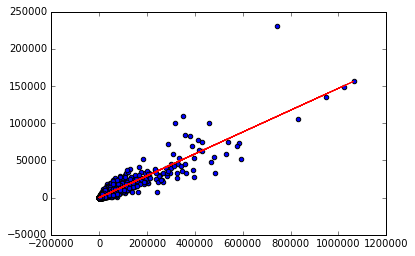

In [45]:
plt.scatter(data_4.Total_Households,data_4.Households_Inc_More_125000)
plt.plot(data_4.Total_Households,lm.predict(),'r-')
plt.show()

### Log Scale matters. Let's model this:  $y=w_0*x^{w_1}$ or $lny=w_1*lnx+lnw_0$

In [46]:
#q6. generate two new columns: log_Households_Inc_More_125000 and log_Total_Households in data_4 using np.log() function.
data_4.loc[:,"log_Households_Inc_More_125000"]=np.log(data_4.Households_Inc_More_125000)
data_4.loc[:,"log_Total_Households"]=np.log(data_4.Total_Households)

In [47]:
#q7. repeat everything. Get w1, and plot the result.
lm = smf.ols(formula='log_Households_Inc_More_125000 ~ log_Total_Households', data = data_4).fit()
print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     log_Households_Inc_More_125000   R-squared:                       0.841
Model:                                        OLS   Adj. R-squared:                  0.841
Method:                             Least Squares   F-statistic:                 8.227e+04
Date:                            Fri, 09 Sep 2016   Prob (F-statistic):               0.00
Time:                                    16:11:00   Log-Likelihood:                -19233.
No. Observations:                           15521   AIC:                         3.847e+04
Df Residuals:                               15519   BIC:                         3.849e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

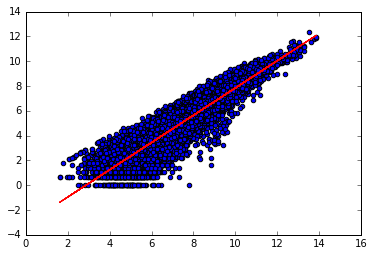

In [48]:
plt.scatter(data_4.log_Total_Households,data_4.log_Households_Inc_More_125000)
plt.plot(data_4.log_Total_Households,lm.predict(),'r-')
plt.show()

### What does the value of w1 mean? 